In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import pandas as pd
sys.path.insert(0, "../src")
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from os.path import join as oj
import configparser
import os
pd.set_option('display.float_format', lambda x: '%.2f' % x)

config = configparser.ConfigParser()
config.read('../config.ini');
data_path =config['DATASET']['data_path'] 
from torch.nn import functional as F

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
fnames = sorted([oj(config['PATHS']['model_path'] , fname) for fname in os.listdir(config['PATHS']['model_path'] ) if "pkl" in fname]) 
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 

results = pd.concat(results_list, axis=1).T.infer_objects()

results.experiment_name.unique()
results['best_val_score'] = [max(x) for x in results.val_scores]
results[['foldername',  'final_dice_score','cost_function', 'add_ratio','experiment_name']].groupby([ 'experiment_name','foldername','add_ratio',  'cost_function']).mean()

final_dice_score
experiment_name      foldername   add_ratio cost_function                     
01Aquisition         lno_halfHour 0.01      random_cost                    NaN
                                            uncertainty_cost               NaN
                                  0.05      random_cost                    NaN
BaselineFullDataset  lno          0.00      uncertainty_cost              0.96
BaselineNoAquisition lno_halfHour 0.00      random_cost                   0.88

In [12]:
test_results = results[results.experiment_name == '01Aquisition'][results.cost_function == 'random_cost']
test_results

C:\Users\lauri\AppData\Local\Temp\ipykernel_12020\1383974888.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_results = results[results.experiment_name == '01Aquisition'][results.cost_function == 'random_cost']


,file_name,epochs,batch_size,cost_function,add_ratio,foldername,poolname,experiment_name,lr,image_size,...,offset,seed,val,export_results,add_step,val_scores,train_losses,num_classes,final_dice_score,best_val_score
0,0103682462,250,128,random_cost,0.01,lno_halfHour,lno,01Aquisition,0.00,128,...,64,1,10,0,10,"[0.9029025435447693, 0.9947811365127563, 0.854...","[0.0011768018202928943, 8.271867585563086e-05,...",3,NaN,0.99
7,5784121388,250,128,random_cost,0.05,lno_halfHour,lno,01Aquisition,0.00,128,...,64,2,10,0,10,"[0.9170404076576233, 0.9382912516593933, 0.994...","[0.0014154280372622452, 0.00010410690833850822...",3,NaN,0.99
8,6373297791,250,128,random_cost,0.01,lno_halfHour,lno,01Aquisition,0.00,128,...,64,2,10,0,10,"[0.9170404076576233, 0.9382912516593933, 0.994...","[0.0014154280549973919, 0.00010410691015749762...",3,NaN,0.99
14,8785739133,250,128,random_cost,0.01,lno_halfHour,lno,01Aquisition,0.00,128,...,64,0,10,0,10,"[0.8145703673362732, 0.8832558989524841, 0.936...","[0.0013048256903402944, 0.0005656901704469419,...",3,NaN,1.00


IndexError: index 0 is out of bounds for axis 0 with size 0

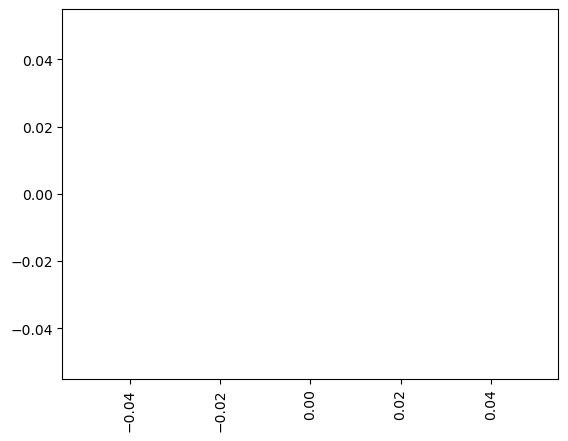

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into a pandas DataFrame
# df = pd.read_csv("your_data.csv")

# Group the data by experiment name
show_results = results[results.experiment_name == "RealValBaselineNoAquisition"]
grouped = show_results.groupby("cost_function")

# Calculate the mean and standard deviation for each group
means = grouped.final_dice_score.mean()
stds = grouped.final_dice_score.std()

# Plot the data as a bar chart
means.plot(kind="bar", yerr=stds, capsize=5)

# Add axis labels and a title
plt.xlabel("Experiment Name")
plt.ylabel("Value")
plt.title("Summary of Results by Experiment Name")

# Show the plot
plt.show()

In [ ]:
results[['experiment_name', 'file_name',  'cost_function',]]

In [ ]:
import matplotlib.pyplot as plt

results_dict = {"Sparse Annotation": 0.79,  "Active Learning": 0.92, "Fully learned": 0.96, 'Human' : 0.97, }

fig, ax = plt.subplots()
ax.bar(results_dict.keys(), results_dict.values(), width=0.4, align='center')
ax.set_ylim([0.6, 1])
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.grid(True, which='both', axis='y')

# Highlight the small difference between Active Learning and Fully learned
ax.annotate(f'{results_dict["Fully learned"] - results_dict["Active Learning"]:.2f}',
            xy=("Fully learned", results_dict["Fully learned"] - 0.03), 
            xytext=("Active Learning", results_dict["Active Learning"] + 0.03),
            arrowprops={'arrowstyle': '->', 'color': 'red'})

plt.show()